In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../")

from veroku.factors.normal_gamma import NormalGamma
from veroku.factors.factor_operations import normal_gamma_prior_batch_data_update
from veroku.factors.unknown_gaussian_1d import UnknownGaussian1D
from veroku.factors.unknown_gaussian import UnknownGaussian 
from veroku.factors.gaussian_wishart import GaussianWishart
from veroku.factors.generalized_categorical import GeneralizedCategorical
import  matplotlib.pyplot as plt
import numpy as np

In [4]:
factors_table = {}
for i in range(3):
    gw = GaussianWishart(v=3, inv_V=0.1, lambda_0=3, mu_0=np.random.uniform(0,1), log_weight=0.0, var_names=["mu", "K"])
    factors_table[(i,)] = gw
gc = GeneralizedCategorical(var_names=["a"], cardinalities=(3,), factors_table=factors_table)
a = gc.marginalize(vrs=["a"], keep=False)
b = gc.marginalize(vrs=["a"], keep=False)
a.multiply(b)

v = 5 
inv_V = [[0.2]] 
lambda_0 = 6
mu_0 = [[0.6658773]] 
log_weight = -3.4206927215840413var_names: ['mu', 'K']

v = 5 
inv_V = [[0.41457976]] 
lambda_0 = 6
mu_0 = [[0.47676544]] 
log_weight = -5.243062768753877var_names: ['mu', 'K']

v = 5 
inv_V = [[0.60371567]] 
lambda_0 = 6
mu_0 = [[0.40648195]] 
log_weight = -6.182657644449888var_names: ['mu', 'K']

v = 5 
inv_V = [[0.41457976]] 
lambda_0 = 6
mu_0 = [[0.47676544]] 
log_weight = -5.243062768753877var_names: ['mu', 'K']

v = 5 
inv_V = [[0.2]] 
lambda_0 = 6
mu_0 = [[0.28765359]] 
log_weight = -3.4206927215840413var_names: ['mu', 'K']

v = 5 
inv_V = [[0.22963861]] 
lambda_0 = 6
mu_0 = [[0.2173701]] 
log_weight = -3.766166366897311var_names: ['mu', 'K']

v = 5 
inv_V = [[0.60371567]] 
lambda_0 = 6
mu_0 = [[0.40648195]] 
log_weight = -6.182657644449888var_names: ['mu', 'K']

v = 5 
inv_V = [[0.22963861]] 
lambda_0 = 6
mu_0 = [[0.2173701]] 
log_weight = -3.766166366897311var_names: ['mu', 'K']

v = 5 
inv_V = [[0.2]] 
lambda_0 = 6
mu

# Test Normal-Gamma and Gaussian Wishart Product Equavalence (1D)

In [19]:
float(np.array([[6.32]]))

/tmp/ipykernel_163241/286270875.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(np.array([[6.32]]))


6.32

In [27]:
test_data = []
for i in range(10):
    alpha_a= np.round(np.random.uniform(2,10), 2)
    beta_a= np.round(np.random.uniform(0,10), 2)
    kappa_a= np.round(np.random.uniform(0,10), 2)
    mu_a= np.round(np.random.uniform(0,10), 2)
    alpha_b= np.round(np.random.uniform(2,10), 2)
    beta_b= np.round(np.random.uniform(0,10), 2)
    kappa_b= np.round(np.random.uniform(0,10), 2)
    mu_b= np.round(np.random.uniform(0,10), 2)

    v_a = 2*alpha_a
    inv_V_a = 2*beta_a
    lambda_a = kappa_a

    v_b = 2*alpha_b
    inv_V_b = 2*beta_b
    lambda_b = kappa_b

    gw_a = GaussianWishart(v=v_a, inv_V=np.array([[inv_V_a]]), lambda_0=lambda_a, mu_0=mu_a, log_weight=0.0, var_names=["mu", "K"])
    gw_b = GaussianWishart(v=v_b, inv_V=np.array([[inv_V_b]]), lambda_0=lambda_b, mu_0=mu_b, log_weight=0.0, var_names=["mu", "K"])
    gaussian_wishart_product = gw_a.absorb(gw_b)
    print()
    for gw, label in zip([gw_a, gw_b, gaussian_wishart_product], ["factor_a", "factor_b", "ab_product"]):
        param_dict = gw.get_param_dict()
        param_dict["factor_label"] = label
        param_dict["example_index"] = i
        test_data.append(param_dict)
    
    gaussian_wishart_params = gaussian_wishart_product.get_normal_gamma_param_dict()

    ng_a = NormalGamma(alpha=alpha_a, beta=beta_a, kappa_0=kappa_a, mu_0=mu_a, var_names=["mu", "K"])
    ng_b = NormalGamma(alpha=alpha_b, beta=beta_b, kappa_0=kappa_b, mu_0=mu_b, var_names=["mu", "K"])
    normal_gamma_product = ng_a.absorb(ng_b)
    normal_gamma_params = normal_gamma_product.get_param_dict()
    
    assert set(gaussian_wishart_params.keys()) == set(normal_gamma_params.keys())
    for key in gaussian_wishart_params.keys():
        gw_value = gaussian_wishart_params[key]
        ng_value = normal_gamma_params[key]
        if not np.isclose(gw_value, ng_value):
            print(key)
            print(f"{gw_value} != {ng_value}")

In [28]:
pwd

'/home/ej/personal_projects/veroku/examples'

{'v': 14.9,
 'inv_V': 12.24,
 'lambda_0': 7.38,
 'mu_0': 3.3,
 'var_names': ['mu', 'K'],
 'log_weight': 0.0}

In [48]:
import pandas as pd
df = pd.DataFrame(test_data)
df.to_csv("/home/ej/personal_projects/veroku/veroku/tests/test_data/gaussian_wishart_1d_mulitplication.csv", index=False)
example_df = df[df["example_index"] == 0]

factors_params_dict

{'ab_product': {'v': 29.380000000000003,
  'inv_V': 143.0150931288783,
  'lambda_0': 16.76,
  'mu_0': 6.204665871121718,
  'var_names': ['mu', 'K'],
  'log_weight': -22.880386896130005},
 'factor_a': {'v': 15.48,
  'inv_V': 19.52,
  'lambda_0': 9.38,
  'mu_0': 8.49,
  'var_names': ['mu', 'K'],
  'log_weight': 0.0},
 'factor_b': {'v': 14.9,
  'inv_V': 12.24,
  'lambda_0': 7.38,
  'mu_0': 3.3,
  'var_names': ['mu', 'K'],
  'log_weight': 0.0}}

In [6]:
ng_a = NormalGamma(alpha=alpha_a, beta=beta_a, kappa_0=kappa_a, mu_0=mu_a, var_names=["mu", "K"])
ng_b = NormalGamma(alpha=alpha_b, beta=beta_b, kappa_0=kappa_b, mu_0=mu_b, var_names=["mu", "K"])
normal_gamma_product = ng_a.absorb(ng_b)
normal_gamma_product.get_param_dict()

{'mu_0': 8.266581560443122,
 'kappa_0': 4.289684999368739,
 'alpha': 11.276766117129666,
 'beta': 21.404702773084438,
 'log_weight': -9.777399820732416}

In [7]:
alpha_0 = 0
beta_0 = 2
kappa_0 = 1
mu_0 = 0

v_0 = 2*alpha_0
inv_V_0 = 2*beta_0
lambda_0 = kappa_0

gw_prior = GaussianWishart(v=v_a, inv_V=np.array([[inv_V_a]]), lambda_0=lambda_a, mu_0=mu_a, log_weight=0.0, var_names=["mu", "K"])

#gaussian_wishart_params = gaussian_wishart_product.get_normal_gamma_param_dict()

ng_prior = NormalGamma(alpha=alpha_a, beta=beta_a, kappa_0=kappa_a, mu_0=mu_a, var_names=["mu", "K"])


In [8]:
def run_parameter_inference(prior, X):
    prior_class_name = prior.__class__.__name__
    if prior_class_name == 'GaussianWishart':
        UnknownGaussianClass = UnknownGaussian
    elif prior_class_name == "NormalGamma":
        UnknownGaussianClass = UnknownGaussian1D
    else:
        raise TypeError()
    posterior = prior.copy()
    
    for i, x in enumerate(X):
        x_var_name = f"x_{i}"
        ugauss = UnknownGaussianClass(var_names=["mu", "K", x_var_name])
        update_factor = ugauss.observe(vrs=[x_var_name], values=[x])
        
        posterior = posterior.multiply(update_factor)
    if prior_class_name == 'GaussianWishart':
        normal_gamma_param_dict = posterior.get_normal_gamma_param_dict()
    elif prior_class_name == "NormalGamma":
        normal_gamma_param_dict = posterior.get_param_dict()
        #print("mode = ", posterior.mode)
    else:
        raise TypeError()
    return normal_gamma_param_dict["log_weight"]    
    #print(normal_gamma_param_dict)
gw_log_weights = []
ng_log_weights = []
for i in range(100):
    X = np.random.normal(4, 2, 100)
    gw_log_weights.append(run_parameter_inference(gw_prior, X))
    ng_log_weights.append(run_parameter_inference(ng_prior, X))

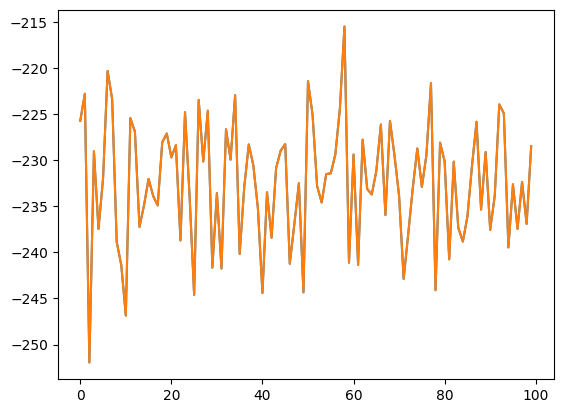

In [9]:
plt.plot(gw_log_weights)
plt.plot(ng_log_weights)

In [ ]:
#plt.plot()
np.exp(np.array(gw_log_weights) - np.array(ng_log_weights))

In [ ]:
batch_updated_posterior = normal_gamma_prior_batch_data_update(prior, X)
#batch_updated_posterior.plot(mu_limits=[3., 6], lambda_limits=[0.1, 0.4])
print("mode: ", batch_updated_posterior.mode)
batch_updated_posterior

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def update(frame):
    im.set_array(image_list[frame])  # Update the image
    return im,

fig, ax = plt.subplots()
im = ax.imshow(image_list[0], cmap='gray')

ani = FuncAnimation(fig, update, frames=len(image_list), interval=200)



In [ ]:
from veroku.factors.generalized_categorical import GeneralizedCategorical
x_var_name = "x"
n = 3
factors_table = {}
priors = []
for i in range(n):
    ng_var_names=[f"alpha_{i}", f"beta_{i}", f"mu_0_{i}", f"kappa_0_{i}"]
    prior = NormalGamma(
        alpha=3,
        beta=6,
        mu0=np.random.uniform(-1,1),
        kappa0=1,
        var_names=ng_var_names)
    priors.append(prior)
    ugauss = UnknownGaussian1D(ng_var_names +  [x_var_name])
    factors_table[(i,)] = ugauss
gen_cat = GeneralizedCategorical(var_names = ["c"], cardinalities=[n], factors_table=factors_table)
all_factors = priors + [gen_cat]


In [ ]:

prior.plot()

In [ ]:
X_list = []

for i in range(n):
    X_i = np.random.normal(loc=n, scale=n, size=100)
    X_list.append(X_i)
X = np.hstack(X_list)

In [ ]:
from veroku.cluster_graph import ClusterGraph
cg = ClusterGraph(all_factors)
cg.process_graph()